# CIS 5450 Final Project: Open Food Facts (Fall 2022)

Hi! We are Sanju Peddagorla , Tanaka Muchemwa, and Vinidu Jayasekera. In our final project, we have  analyzed a food nutrition dataset. We have completed extensive Exploratory Data Analysis and provided visualizations of interesting relationships and trends that we observed in our dataset. We have also modeled the data using different classifiers, such as Logistic Regression and Decision Trees.

# Load and Clean Data

We chose the open food facts Kaggle dataset for this project because we were interested in understanding the nutritious value of the food we consume everyday. We also wanted to observe how food consumption trends varied across different countries.

To begin, we extracted the API key of the dataset in the form of a json file and uploaded the file to a shared Google Drive.


In [ ]:
# Sklearn and Pandas Setup
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split

In [ ]:
# Run this cell to mount your drive (you will be prompted to sign in)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Create the kaggle directory and read the uploaded kaggle.json file
# (NOTE: Do NOT run this cell more than once unless restarting kernel)
!mkdir ~/.kaggle

In [ ]:
# Read the uploaded kaggle.json file
!cp /content/drive/Shareddrives/CIS545_Final/kaggle.json ~/.kaggle/

In [ ]:
# Download dataset
!!kaggle datasets download -d openfoodfacts/world-food-facts

['Downloading world-food-facts.zip to /content',
 '',
 '  0% 0.00/109M [00:00<?, ?B/s]',
 '  1% 1.00M/109M [00:00<01:18, 1.45MB/s]',
 '  2% 2.00M/109M [00:00<00:39, 2.84MB/s]',
 '  4% 4.00M/109M [00:00<00:18, 5.99MB/s]',
 '  7% 8.00M/109M [00:01<00:08, 12.6MB/s]',
 ' 11% 12.0M/109M [00:01<00:05, 17.6MB/s]',
 ' 14% 15.0M/109M [00:01<00:05, 19.7MB/s]',
 ' 17% 18.0M/109M [00:01<00:04, 21.8MB/s]',
 ' 19% 21.0M/109M [00:01<00:03, 23.4MB/s]',
 ' 22% 24.0M/109M [00:01<00:03, 24.7MB/s]',
 ' 26% 28.0M/109M [00:01<00:03, 27.5MB/s]',
 ' 29% 31.0M/109M [00:01<00:02, 27.7MB/s]',
 ' 31% 34.0M/109M [00:02<00:04, 18.2MB/s]',
 ' 34% 37.0M/109M [00:02<00:04, 15.5MB/s]',
 ' 38% 41.0M/109M [00:02<00:03, 19.2MB/s]',
 ' 40% 44.0M/109M [00:02<00:03, 20.7MB/s]',
 ' 44% 48.0M/109M [00:02<00:02, 23.9MB/s]',
 ' 47% 51.0M/109M [00:02<00:02, 24.9MB/s]',
 ' 50% 54.0M/109M [00:03<00:02, 26.4MB/s]',
 ' 52% 57.0M/109M [00:03<00:02, 25.0MB/s]',
 ' 55% 60.0M/109M [00:03<00:02, 19.7MB/s]',
 ' 58% 63.0M/109M [00:03<00:02,

In [ ]:
# Unzip folder in Colab content folder
!unzip /content/world-food-facts.zip

Archive:  /content/world-food-facts.zip
  inflating: en.openfoodfacts.org.products.tsv  


We then loaded the .tsv file into a dataframe 'df'.

In [ ]:
df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep='\t')
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356022,99567453,http://world-en.openfoodfacts.org/product/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
356023,9970229501521,http://world-en.openfoodfacts.org/product/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356024,9977471758307,http://world-en.openfoodfacts.org/product/9977...,openfoodfacts-contributors,1497018549,2017-06-09T14:29:09Z,1500730305,2017-07-22T13:31:45Z,Biscottes bio,NaN,300g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
356025,9980282863788,http://world-en.openfoodfacts.org/product/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Once we had a dataframe with all of the data, we began our cleaning.

We observed that there was a lot of missing data in our dataframe. Since our dataset is large, we decided to drop as many null values as possible. First, we dropped all rows with more than 54 null values, which is approximately half of the number of total features and then all the columns that had more than 50% null values.

Next, we dropped the features that didn't pertain to our analysis, such as 'code' and 'created_datetime' and 'image_url'.

Finally, we dropped duplicate values

In [ ]:
#drops rows with more than 54 null values
df = df.dropna(thresh = 54, axis=0).reset_index()
#drops columns with more than 50% null values
df = df.dropna(thresh = 0.5*len(df), axis = 1).reset_index()
#drops unnecessary columns
df = df.drop(columns=['index', 'code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'packaging_tags', 'brands_tags', 'categories_tags', 'manufacturing_places_tags', 'labels_tags', 'emb_codes_tags',
                      'countries_tags', 'additives_tags', 'states_tags', 'categories', 'labels', 'countries', 'additives', 'states', 'states_en',
                      'main_category', 'image_url', 'image_small_url', 'categories_en', 'generic_name', 'quantity', 'emb_codes', 'stores', 'purchase_places', 'additives_en', 'packaging', 'ingredients_text', 'allergens', 'serving_size', 'manufacturing_places'])


In [ ]:
#drops unnecessary columns
df = df.drop(columns=['level_0'])
#drops duplicates
df = df.drop_duplicates()

We printed out the datatypes of the remaining columns to check if there were any columns that needed to be converted to a different datatype. In this case, we didn't have to change any datatypes.

In [ ]:
df.dtypes

product_name                                object
brands                                      object
labels_en                                   object
countries_en                                object
additives_n                                float64
ingredients_from_palm_oil_n                float64
ingredients_that_may_be_from_palm_oil_n    float64
nutrition_grade_fr                          object
pnns_groups_1                               object
pnns_groups_2                               object
main_category_en                            object
energy_100g                                float64
fat_100g                                   float64
saturated-fat_100g                         float64
carbohydrates_100g                         float64
sugars_100g                                float64
fiber_100g                                 float64
proteins_100g                              float64
salt_100g                                  float64
sodium_100g                    

Then, we checked the number of non-null instances in each column and saw that the numbers were generally around the same, so we could continue our data analysis with the existing columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36941 entries, 0 to 37176
Data columns (total 22 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   product_name                             36931 non-null  object 
 1   brands                                   36918 non-null  object 
 2   labels_en                                26283 non-null  object 
 3   countries_en                             36938 non-null  object 
 4   additives_n                              36861 non-null  float64
 5   ingredients_from_palm_oil_n              36861 non-null  float64
 6   ingredients_that_may_be_from_palm_oil_n  36861 non-null  float64
 7   nutrition_grade_fr                       36351 non-null  object 
 8   pnns_groups_1                            35782 non-null  object 
 9   pnns_groups_2                            35835 non-null  object 
 10  main_category_en                         35798

We observed that some instances had countries that were comma separated in the countries_en column. To fix this, we split the countries by ',' and exploded the dataframe to ensure that each row had exactly 1 country.

In [ ]:
#Split the comma seperated countries and duplicate the reemaining values in each row across the counties
df = df.assign(countries_en=df['countries_en'].str.split(',')).explode('countries_en')


We then normalized the values under pnns_groups by converting everything into lowercase strings and replacing hyphens with a whitespace.

In [ ]:
df['pnns_groups_1'] = df['pnns_groups_1'].astype('str')
df.dtypes

df['pnns_groups_1'] = df['pnns_groups_1'].apply(lambda x : x.lower().replace('-', ' '))
df.head(5)

,product_name,brands,labels_en,countries_en,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Salade Cesar,Kirkland Signature,NaN,Canada,0.0,0.0,0.0,c,fruits and vegetables,Vegetables,...,12.00,7.000,23.0,0.00,2.00,22.00,2.1600,0.8500,6.0,6.0
1,Danoises à la cannelle roulées,Kirkland Signature,NaN,Canada,10.0,0.0,1.0,NaN,sugary snacks,Biscuits and cakes,...,14.40,NaN,54.1,28.10,2.05,4.79,0.9220,0.3630,NaN,NaN
2,Chaussons tressés aux pommes,Kirkland Signature,NaN,Canada,5.0,0.0,0.0,c,sugary snacks,Biscuits and cakes,...,10.70,2.000,38.7,24.70,2.00,3.33,0.6470,0.2550,9.0,9.0
3,Pain Burger Artisan,Kirkland Signature,NaN,Canada,0.0,0.0,0.0,b,unknown,unknown,...,1.11,0.333,53.3,1.11,2.22,10.00,1.5200,0.6000,1.0,1.0
4,Root Beer,A&W,"Kosher,fr:Contient-des-ogm",France,3.0,0.0,0.0,e,beverages,Sweetened beverages,...,0.00,0.000,14.2,13.60,0.00,0.00,0.0616,0.0242,18.0,3.0


# EDA

At this stage, our overall dataset has been cleaned and is ready for analysis.

To determine which plots would be ideal for this dataset, we carried out a few basic operations on the dataset.

In [ ]:

df['count'] = df['product_name'].apply(lambda x : 1)
df.head(5)

,product_name,brands,labels_en,countries_en,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,...,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,count
0,Salade Cesar,Kirkland Signature,NaN,Canada,0.0,0.0,0.0,c,fruits and vegetables,Vegetables,...,7.000,23.0,0.00,2.00,22.00,2.1600,0.8500,6.0,6.0,1
1,Danoises à la cannelle roulées,Kirkland Signature,NaN,Canada,10.0,0.0,1.0,NaN,sugary snacks,Biscuits and cakes,...,NaN,54.1,28.10,2.05,4.79,0.9220,0.3630,NaN,NaN,1
2,Chaussons tressés aux pommes,Kirkland Signature,NaN,Canada,5.0,0.0,0.0,c,sugary snacks,Biscuits and cakes,...,2.000,38.7,24.70,2.00,3.33,0.6470,0.2550,9.0,9.0,1
3,Pain Burger Artisan,Kirkland Signature,NaN,Canada,0.0,0.0,0.0,b,unknown,unknown,...,0.333,53.3,1.11,2.22,10.00,1.5200,0.6000,1.0,1.0,1
4,Root Beer,A&W,"Kosher,fr:Contient-des-ogm",France,3.0,0.0,0.0,e,beverages,Sweetened beverages,...,0.000,14.2,13.60,0.00,0.00,0.0616,0.0242,18.0,3.0,1



We extracted the countries from the database and created a new column `'occurrence'` to keep track of the number of occurrences of each country in the data set.

From this data, we saw that many countries had vey few instances, most having just one.

In order to obtain meaningful and readable plots, we decided to drop any countries that didn't belong to a reasonable number of instances.



In [ ]:
#counting the number of occurences of each country
countries_df = df[['countries_en']]
countries_df = countries_df.rename(columns = {'countries_en' : 'country'})
countries_df = countries_df.dropna(axis=0)
countries_df['occurrence'] = countries_df['country'].apply(lambda x : 1)
countries_df2 = countries_df.groupby(['country'])['occurrence'].sum().reset_index()
countries_df2 = countries_df2.sort_values(by = 'occurrence', ascending = False)
countries_df2.head(20)

,country,occurrence
26,France,29121
77,Spain,2442
86,United States,2063
30,Germany,1546
79,Switzerland,1229
85,United Kingdom,806
7,Belgium,668
5,Australia,313
61,Portugal,251
13,Canada,170


Since France had the most data in the dataset, we set a reasonable cutoff based on the number of its instances (29121), which we decided would be 500.

In [ ]:
# create a dataframe with only the countries that have more than 500 instances.
temp2 = temp[(temp.countries_en == 'France') | (temp.countries_en == 'United States') | (temp.countries_en == 'United Kingdom')
              | (temp.countries_en == 'Spain') | (temp.countries_en == 'Switzerland') | (temp.countries_en == 'Germany')
              | (temp.countries_en == 'Belgium') | (temp.countries_en == 'Belgium')]
temp2

,countries_en,pnns_groups_1,count
29,Belgium,beverages,68
30,Belgium,cereals and potatoes,110
31,Belgium,composite foods,32
32,Belgium,fat and sauces,20
33,Belgium,fish meat eggs,38
...,...,...,...
387,United States,fish meat eggs,28
388,United States,fruits and vegetables,29
389,United States,milk and dairy products,83
391,United States,salty snacks,62


We observed that France still had a significantly larger number of instances than other countries.

To be able to meaningfully visualize other countries on a plot against France and make our plots less susceptible to scale differences, we decided to convert the count data into percentages within each group for each country. The percentage was calculated as the amount consumed of that category divided by the total consumption of all food groups in a specific country.

In [ ]:
#number of instances of each country is counted with a group by operation and the percentages of each category are calculated.
temp3 = temp2.groupby(['countries_en']).sum().reset_index()

joined = temp2.merge(temp3, left_on = 'countries_en', right_on = 'countries_en', how = 'left')
joined = joined.rename(columns = {'count_x' : 'count', 'count_y' : 'sum'})
joined['percentage'] = joined['count']/joined['sum'] * 100
joined['percentage'] = joined['percentage'].round(2)
joined.head(20)

,countries_en,pnns_groups_1,count,sum,percentage
0,Belgium,beverages,68,612,11.11
1,Belgium,cereals and potatoes,110,612,17.97
2,Belgium,composite foods,32,612,5.23
3,Belgium,fat and sauces,20,612,3.27
4,Belgium,fish meat eggs,38,612,6.21
5,Belgium,fruits and vegetables,13,612,2.12
6,Belgium,milk and dairy products,95,612,15.52
7,Belgium,salty snacks,35,612,5.72
8,Belgium,sugary snacks,201,612,32.84
9,France,beverages,1453,26447,5.49


We picked a bar plot to visualize the countries against the percentage of each category consumed.

We made this decision because the data is categorical.

This plot provided insights into the consumption by food category within countries as well as a meaningful comparison between different countries.

We were surprised to observe that sugary snacks is the most consumed category in each country except for the United States. We will use this information in a later plot.

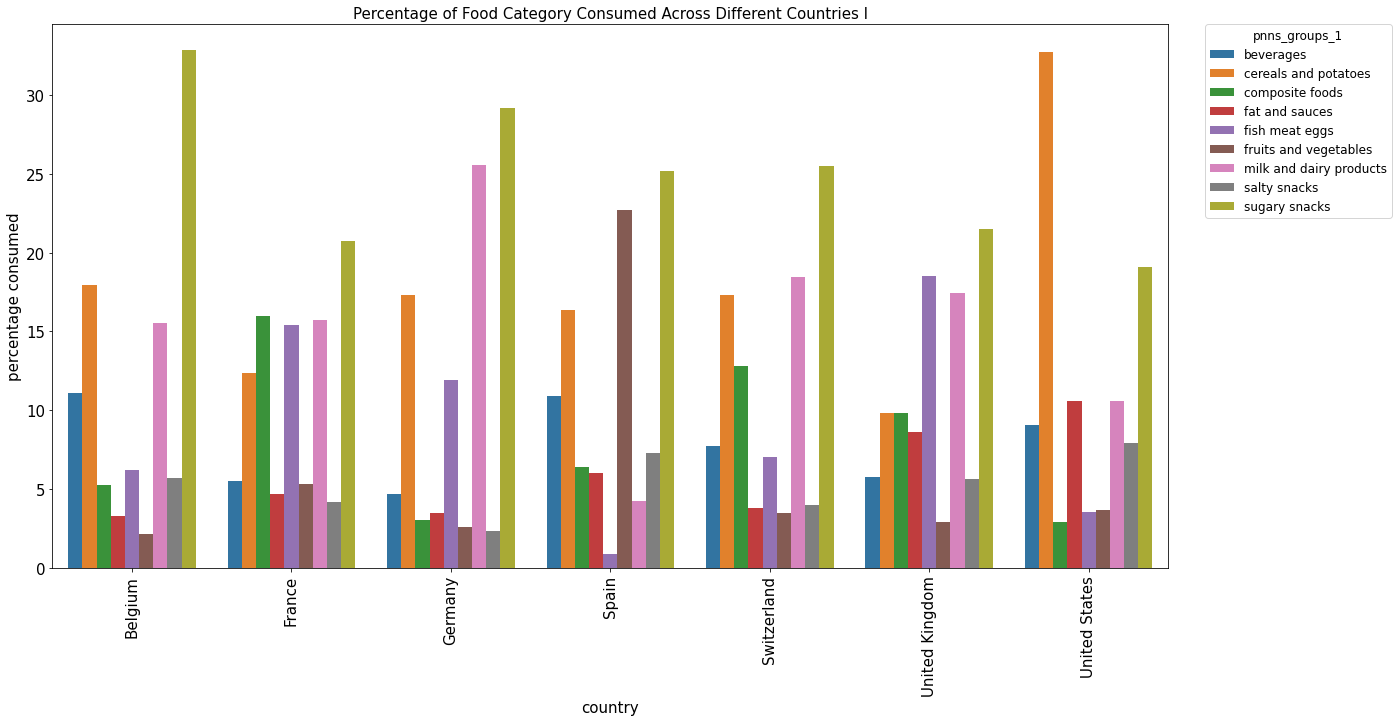

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plot = sns.barplot(data= joined, x= 'countries_en', y='percentage', hue='pnns_groups_1', ax = ax)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = (1.20, 1), loc = 'upper right', borderaxespad=0, title="pnns_groups_1", fontsize=12, title_fontsize=12)
plt.title('Percentage of Food Category Consumed Across Different Countries I', size = 15)
plt.xlabel(xlabel = "country", size=15)
plt.ylabel(ylabel = "percentage consumed", size=15)
plt.show()

Next, we visualized the same data in a different way. In this plot, we plotted the category against the percentage consumed with the countries as hues.

We were able to observe which countries consumed the highest percentage within each food category. An interesting observation that was clearer in this plot than the previous one is that Belgium consumed the highest percentage of sugary snacks. Another interesting observation is that all countries generally consumed a much smaller proportion of salty snacks than sugary snacks.

This plot is a better way to visualize percentage differences within categories while the previous plot was better for visualizing differences within a country.

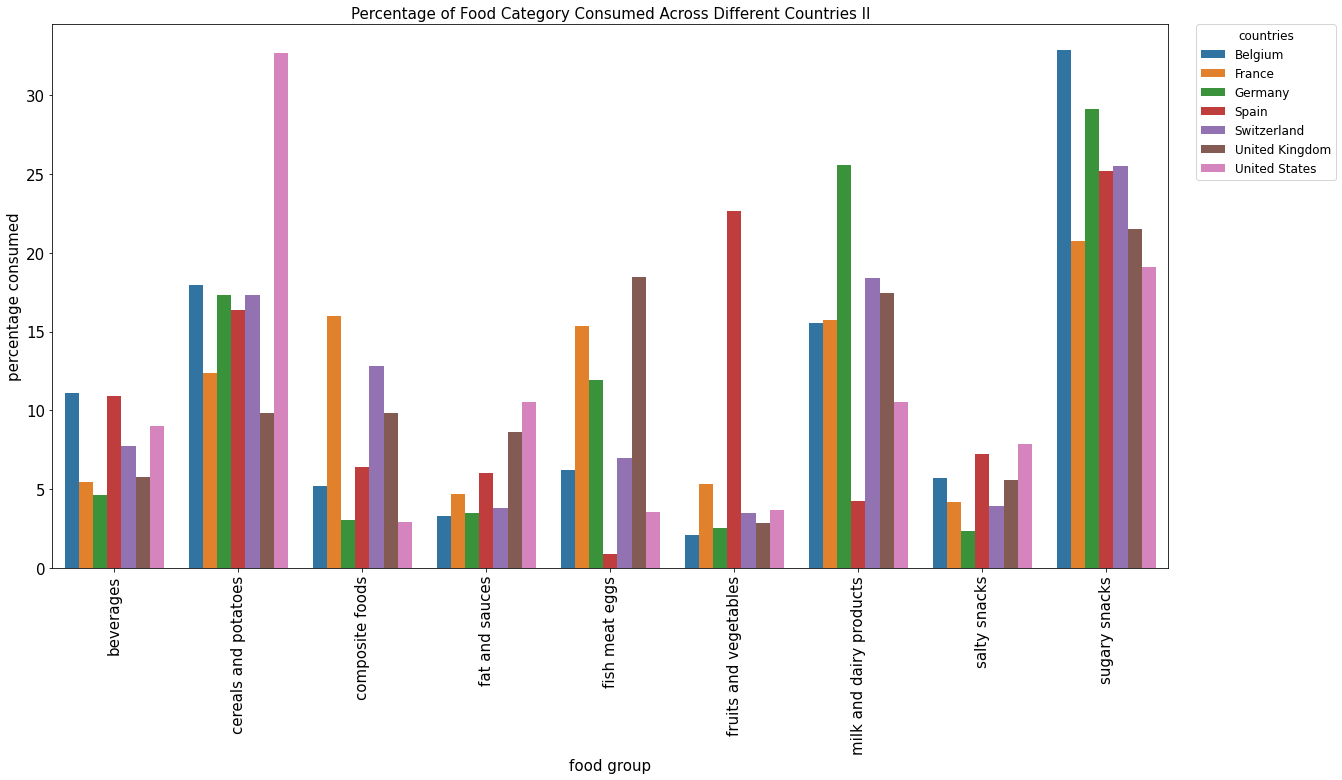

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='both', which='major', labelsize=15)
plot = sns.barplot(data= joined, x= 'pnns_groups_1', y='percentage', hue='countries_en', ax = ax)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = (1.15, 1), loc = 'upper right', borderaxespad=0, title="countries", fontsize=12, title_fontsize=12)
plt.title('Percentage of Food Category Consumed Across Different Countries II', size = 15)
plt.xlabel(xlabel = "food group", size=15)
plt.ylabel(ylabel = "percentage consumed", size=15)
plt.show()

Another attribute that we were interested in analyzing was the nutrition grade.

We wanted to understand which countries consumed food with the highest average nutrition grade.

To do this, we calculated the average nutrition grade of each country.

We first converted the alphabetic grades to numeric values before averaging them. This will also help us in the future when we move onto modeling.

In [ ]:
#extracts countries and corresponding nutrition grades
grades_df = df[['countries_en', 'nutrition_grade_fr']]
grades_df = grades_df.rename(columns = {'countries_en' : 'country'})
grades_df = grades_df.dropna(axis=0)
#extract only the contries that have an occurrence >= 100
grades_df['occurrence'] = grades_df['country'].apply(lambda x : 1)
grades_df2 = grades_df.groupby(['country'])['occurrence'].sum().reset_index()
grades_df2 = grades_df2.sort_values(by = 'occurrence', ascending = False)
grades_df2 = grades_df2[grades_df2.occurrence >= 100]

grades_final_df = grades_df.merge(grades_df2, left_on = 'country', right_on = 'country', how = 'right')
grades_final_df = grades_final_df.drop(columns = {'occurrence_x', 'occurrence_y'})
#convert nutrition grade to scores on a scale of 1-5
def fun(x):
  if x == 'a':
    return 5
  elif x == 'b':
    return 4
  elif x == 'c':
    return 3
  elif x == 'd':
    return 2
  else:
    return 1

#get the corresponding numeric grade
grades_final_df['number_grade'] = grades_final_df['nutrition_grade_fr'].apply(lambda x : fun(x))

grades_final_df = grades_final_df.groupby(['country']).mean().reset_index()
grades_final_df = grades_final_df.rename(columns = {'number_grade' : 'avg_nutrition_grade'})
grades_final_df['avg_nutrition_grade'] = grades_final_df['avg_nutrition_grade'].round(2)
grades_final_df

,country,avg_nutrition_grade
0,Australia,2.81
1,Belgium,2.49
2,Canada,2.92
3,France,2.78
4,Germany,2.59
5,Italy,2.57
6,Netherlands,2.66
7,Portugal,2.66
8,Spain,3.22
9,Sweden,3.05


We chose a bar plot for this visualization to easily compare the average nutrition grades of different countries.

In this plot, we saw that the average nutrition grade was similar across almost all countrie. Spain had a slightly higher grade than the rest of the countries.  

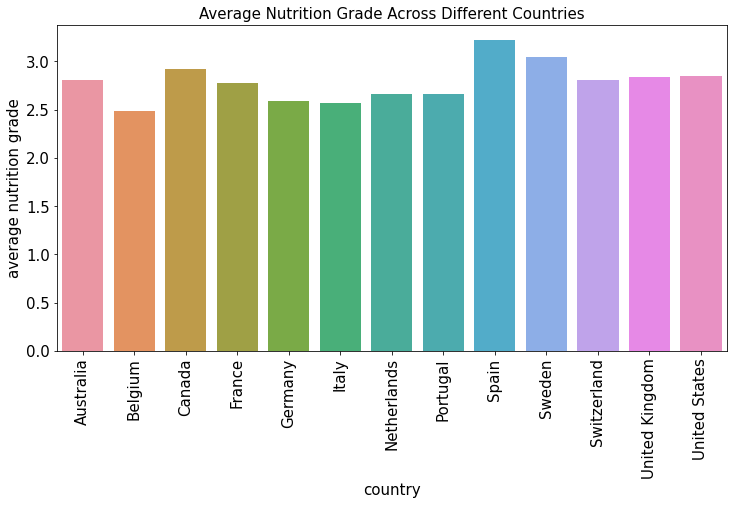

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.tick_params(axis='both', which='major', labelsize=15)
plot = sns.barplot(data= grades_final_df, x= 'country', y='avg_nutrition_grade', ax = ax)
plt.xticks(rotation=90)
plt.title('Average Nutrition Grade Across Different Countries', size = 15)
plt.xlabel(xlabel = "country", size=15)
plt.ylabel(ylabel = "average nutrition grade", size=15)
plt.show()

Earlier, we had observed that sugary snacks was the most consumed category across most countries.

We decided to use this information and further analyze sugary snacks. We specifically looked at the sugar content in sugary snacks to understand which countries consumed the most sugar.

We used a box plot for this visualization so that we could get information on ranges, means, min and max values as well as outliers.

We saw that Sweden had the highest average sugar content in their sugary snacks while the highest sugar content was found in a sugary snack in the United States. (we disregarded the outliers while analyzing this data). We also observed that Sweden had the smallest range and IQR, while the United States, Spain, and France had similar large ranges. Canada had the largest IQR.

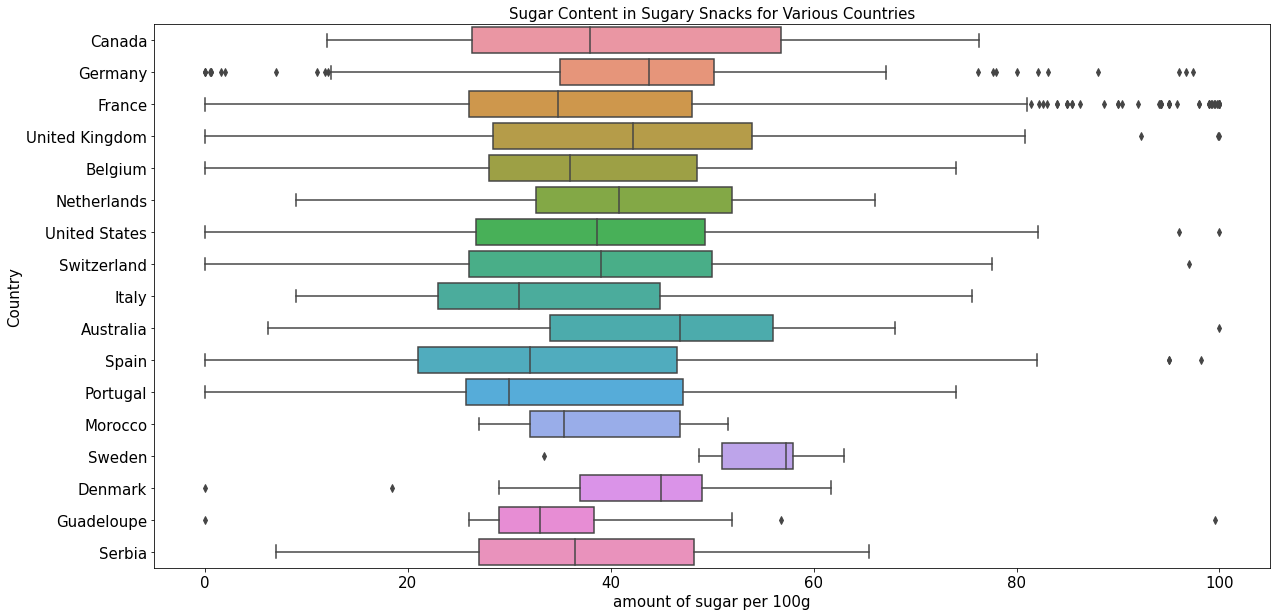

In [ ]:
#extracts category, country and sugar content
sugar_df = df[['countries_en', 'pnns_groups_1', 'sugars_100g']]
sugar_df = sugar_df.rename(columns = {'countries_en' : 'country', 'pnns_groups_1' : 'category', 'sugars_100g' : 'sugars'})
#filtered the rows and kept only those under category 'sugary snacks'
sugar_df = sugar_df[sugar_df.category == 'sugary snacks']
sugar_df = sugar_df.dropna()
#narrows down the dataset to countries with more than 10 instances
sugar_df['count'] = sugar_df['country'].apply(lambda x : 1)

temp_df = sugar_df.groupby('country').sum().reset_index().sort_values(by = 'count', ascending = False)
temp_df = temp_df[temp_df['count'] >= 10]

sugar_df2 = sugar_df.merge(temp_df, left_on = 'country', right_on = 'country', how = 'inner')
sugar_df2 = sugar_df2.drop(columns = {'sugars_y', 'count_y', 'count_x'})
sugar_df2 = sugar_df2.rename(columns = {'sugars_x' : 'sugar'})
sugar_df2

fig, ax = plt.subplots(figsize=(20,10))
plot = sns.boxplot(data=sugar_df2, x="sugar", y="country")
ax.tick_params(axis='both', which='major', labelsize=15)
plt.title('Sugar Content in Sugary Snacks for Various Countries', size = 15)
plt.xlabel(xlabel = "amount of sugar per 100g", size=15)
plt.ylabel(ylabel = "Country", size=15)
plt.show()

Having visualized and observed trends related to sugar content, we wanted to move on to other nutritional composition data. We were interested in understanding the nutritional composition of each food category. To do this, we extracted food categories, product names and nutritional values.

In [ ]:
#extracts product name, nutritional values and category
nutrition_df = df[['product_name', 'pnns_groups_1', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
                   'sodium_100g']]
nutrition_df = nutrition_df.rename(columns = {'product_name': 'product', 'pnns_groups_1' : 'category', 'fat_100g' : 'fat',
                                              'carbohydrates_100g' : 'carbs', 'sugars_100g': 'sugars', 'fiber_100g' : 'fiber',
                                              'proteins_100g' : 'protein', 'sodium_100g' : 'sodium'})

nutrition_df = nutrition_df.dropna(axis=0)
nutrition_df

,product,category,fat,carbs,sugars,fiber,protein,sodium
0,Salade Cesar,fruits and vegetables,12.00,23.00,0.00,2.000,22.00,0.850000
1,Danoises à la cannelle roulées,sugary snacks,14.40,54.10,28.10,2.050,4.79,0.363000
2,Chaussons tressés aux pommes,sugary snacks,10.70,38.70,24.70,2.000,3.33,0.255000
3,Pain Burger Artisan,unknown,1.11,53.30,1.11,2.220,10.00,0.600000
4,Root Beer,beverages,0.00,14.20,13.60,0.000,0.00,0.024200
...,...,...,...,...,...,...,...,...
37171,100% Pur Jus 4 agrumes,beverages,0.50,10.20,9.20,0.600,0.60,0.011811
37172,Spearmint sans sucres,sugary snacks,1.30,95.87,0.12,0.005,0.04,0.001969
37173,tuna chunks in spring water,fish meat eggs,0.50,0.00,0.00,0.000,25.00,0.300000
37174,Blue Cheese Dressing,fat and sauces,53.30,6.40,5.30,0.500,1.70,0.689000


We averaged the nutritional values of each country to be able to plot the data on a bar plot.

In [ ]:
#calculated mean nutritional values across countries
nutrition_grouped_df = nutrition_df.groupby(['category']).mean().reset_index()
nutrition_grouped_df = nutrition_grouped_df[(nutrition_grouped_df.category != 'unknown') & (nutrition_grouped_df.category != 'nan')]
nutrition_grouped_df

,category,fat,carbs,sugars,fiber,protein,sodium
0,beverages,1.447265,12.101430,10.770086,0.839830,1.248176,0.054752
1,cereals and potatoes,6.679437,57.058444,8.828714,5.463197,10.004181,0.274134
2,composite foods,7.322698,15.468794,2.361118,2.073552,7.546625,0.395779
3,fat and sauces,35.023928,7.907851,5.157807,1.086802,2.143230,0.707752
4,fish meat eggs,12.767305,2.333854,0.859034,0.677579,18.463441,0.738721
5,fruits and vegetables,2.739016,15.352407,10.487063,3.214720,2.484727,0.221464
6,milk and dairy products,10.915817,11.901237,10.100956,0.434614,7.497834,0.199521
8,salty snacks,30.176879,46.197063,4.561969,4.625691,10.540935,0.638712
9,sugary snacks,21.873975,56.488379,35.717572,3.847224,6.107444,0.187280


We plotted our graph of categories against their amounts with the different nutrients as the hue.

The most important category that we had focused on throughout our project was sugary snacks. We saw that in this plot, sugary snacks were mostly made of carbs and sugar was just the second highest.

In this plot, we also saw that the two categories that are most popular in the United States(as seen in first plot): sugary snacks and cereals and potatoes is  mainly made up of carbs.

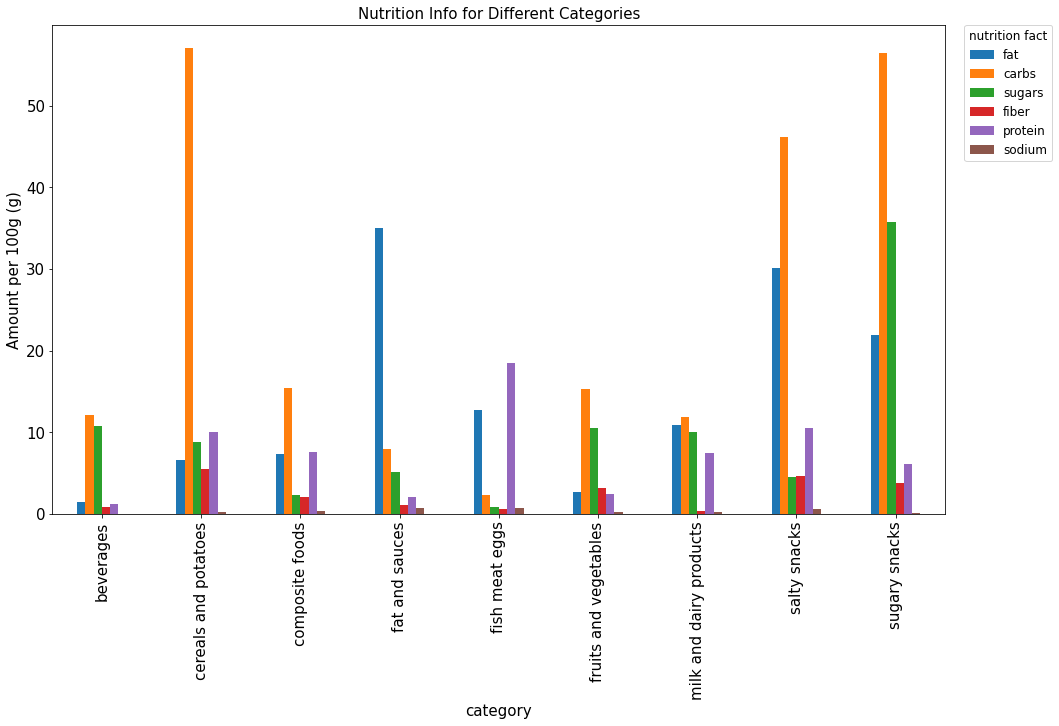

In [ ]:
fig, ax = plt.subplots(figsize=(16,9))
plot = nutrition_grouped_df.plot(x= 'category', y=['fat', 'carbs', 'sugars', 'fiber', 'protein', 'sodium'], ax = ax, kind = "bar")
ax.tick_params(axis='both', which='major', labelsize=15)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor = (1.12, 1), loc = 'upper right', borderaxespad=0, title="nutrition fact", fontsize=12, title_fontsize=12)
plt.title('Nutrition Info for Different Categories', size = 15)
plt.xlabel(xlabel = "category", size=15)
plt.ylabel(ylabel = "Amount per 100g (g)", size=15)
plt.show()

In our final visualization, we decided to plot a heatmap of a correlation matrix between different nutritional values.

We decided that this would be a good way to transition into our modeling since this will tell us what kinds of preprocessing is necessary for our models.

In our heat map we saw that 'energy' and 'fat' were the most correlated.'saturated_fat' and 'fat' were also very correlated, but this was expected since saturated_fat is a sub-category of fat. Given this, we were surprised to see that the correlation between saturated fat and fat was not the strongest, nor as high as we anticipated. Neither of these correlations were extremely high correlations, however they were fairly significant. (~0.7)

Other factors that were slightly correlated were 'sugars' and 'carbs', 'energy' and 'carbs' with correlation coefficients in the 0.5-0.6 range.

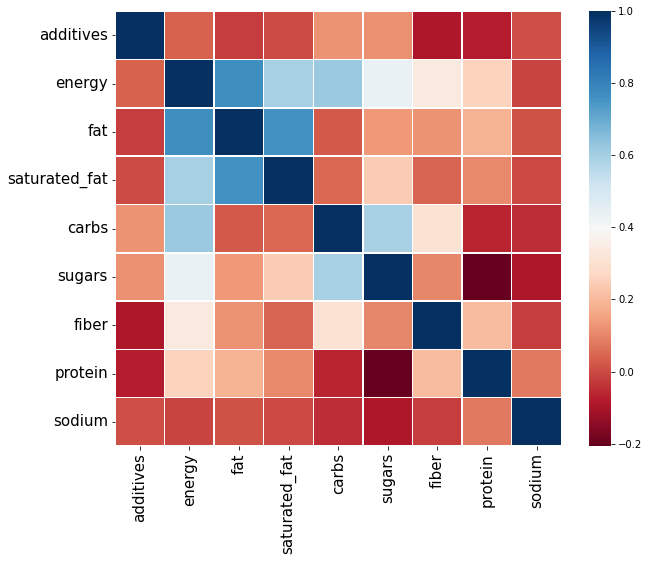

In [ ]:
#extracts nutritional values
df_pair = df[['additives_n', 'energy_100g', 'fat_100g',
         'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
         'sodium_100g']]

df_pair = df_pair.rename(columns = {'additives_n' : 'additives', 'energy_100g' : 'energy', 'fat_100g' : 'fat',
                                    'saturated-fat_100g' : 'saturated_fat', 'carbohydrates_100g' : 'carbs',
                                    'sugars_100g' : 'sugars', 'fiber_100g' : 'fiber', 'proteins_100g' : 'protein',
                                    'sodium_100g' : 'sodium'})

df_pair = df_pair.dropna()
df_pair = df_pair.drop_duplicates()
#correlation matrix
corr_matrix = df_pair.corr()
plt.figure(figsize=(10,8))
map = sns.heatmap(corr_matrix, cmap="RdBu", linewidth=.5)
map.set_xticklabels(map.get_xmajorticklabels(), fontsize=15)
map.set_yticklabels(map.get_ymajorticklabels(), fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

#Modeling

To begin modeling, we first converted the nutrition grade into a numerical equivalent. We decided to set a grade of A to be 4 and E to be 0. Note that F was not included.

In [ ]:
# assigns numeric score to nutrition grade
def fun(x):
  if x == 'a':
    return 4
  elif x == 'b':
    return 3
  elif x == 'c':
    return 2
  elif x == 'd':
    return 1
  else:
    return 0

# extracts the nutrient features
nutrition_grade_df = df[['product_name', 'pnns_groups_1', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
                         'proteins_100g', 'sodium_100g', 'nutrition_grade_fr']]
nutrition_grade_df = nutrition_grade_df.drop_duplicates()
nutrition_grade_df = nutrition_grade_df.dropna()
nutrition_grade_df = nutrition_grade_df[(nutrition_grade_df.pnns_groups_1 != 'nan') & (nutrition_grade_df.pnns_groups_1 != 'unknown')]
nutrition_grade_df['numeric_grade'] = nutrition_grade_df['nutrition_grade_fr'].apply(lambda x : fun(x))
nutrition_grade_df = nutrition_grade_df.drop(columns=['nutrition_grade_fr'])

nutrition_grade_df

,product_name,pnns_groups_1,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,numeric_grade
0,Salade Cesar,fruits and vegetables,12.00,23.00,0.000,2.000,22.00,0.850000,2
2,Chaussons tressés aux pommes,sugary snacks,10.70,38.70,24.700,2.000,3.33,0.255000,2
4,Root Beer,beverages,0.00,14.20,13.600,0.000,0.00,0.024200,0
5,Quiche Lorraine,composite foods,6.79,7.86,0.714,0.357,5.36,0.196000,3
7,Cakes Raisins,sugary snacks,19.00,56.00,28.000,1.800,5.80,0.255906,1
...,...,...,...,...,...,...,...,...,...
37171,100% Pur Jus 4 agrumes,beverages,0.50,10.20,9.200,0.600,0.60,0.011811,2
37172,Spearmint sans sucres,sugary snacks,1.30,95.87,0.120,0.005,0.04,0.001969,2
37173,tuna chunks in spring water,fish meat eggs,0.50,0.00,0.000,0.000,25.00,0.300000,4
37174,Blue Cheese Dressing,fat and sauces,53.30,6.40,5.300,0.500,1.70,0.689000,1


# Preprocessing: One Hot Encoding, Split Into Features & Labels

We used one hot encoding on 'pnns_groups_1' to convert the food categories into a separate boolean columns. This will improve the prediction accuracy of the models we train.

In [ ]:
# perform one hot encoding of pnns_groups_1
nutrition_grade_df = pd.get_dummies(data = nutrition_grade_df, columns = ['pnns_groups_1'])
nutrition_grade_df

,product_name,fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,numeric_grade,pnns_groups_1_beverages,pnns_groups_1_cereals and potatoes,pnns_groups_1_composite foods,pnns_groups_1_fat and sauces,pnns_groups_1_fish meat eggs,pnns_groups_1_fruits and vegetables,pnns_groups_1_milk and dairy products,pnns_groups_1_salty snacks,pnns_groups_1_sugary snacks
0,Salade Cesar,12.00,23.00,0.000,2.000,22.00,0.850000,2,0,0,0,0,0,1,0,0,0
2,Chaussons tressés aux pommes,10.70,38.70,24.700,2.000,3.33,0.255000,2,0,0,0,0,0,0,0,0,1
4,Root Beer,0.00,14.20,13.600,0.000,0.00,0.024200,0,1,0,0,0,0,0,0,0,0
5,Quiche Lorraine,6.79,7.86,0.714,0.357,5.36,0.196000,3,0,0,1,0,0,0,0,0,0
7,Cakes Raisins,19.00,56.00,28.000,1.800,5.80,0.255906,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37171,100% Pur Jus 4 agrumes,0.50,10.20,9.200,0.600,0.60,0.011811,2,1,0,0,0,0,0,0,0,0
37172,Spearmint sans sucres,1.30,95.87,0.120,0.005,0.04,0.001969,2,0,0,0,0,0,0,0,0,1
37173,tuna chunks in spring water,0.50,0.00,0.000,0.000,25.00,0.300000,4,0,0,0,0,1,0,0,0,0
37174,Blue Cheese Dressing,53.30,6.40,5.300,0.500,1.70,0.689000,1,0,0,0,1,0,0,0,0,0


Then, we extracted the columns to be used in the Machine Learning model and renamed them for easier analysis.

In [ ]:
nutrition_grade_df = nutrition_grade_df.drop(columns = ['product_name'])
# rename columns
nutrition_grade_df = nutrition_grade_df.rename(columns = {'fat_100g' : 'fat', 'carbohydrates_100g' : 'carbs', 'sugars_100g' : 'sugars',
                                                          'fiber_100g' : 'fiber', 'proteins_100g' : 'protein', 'sodium_100g' : 'sodium',
                                                          'numeric_grade' : 'grade', 'pnns_groups_1_beverages' : 'beverages',
                                                          'pnns_groups_1_cereals and potatoes' : 'cereals_and_potatoes',
                                                          'pnns_groups_1_composite foods' : 'composite_foods',
                                                          'pnns_groups_1_fat and sauces' : 'fat_and_sauces',
                                                          'pnns_groups_1_fish meat eggs' : 'fish_meat_eggs',
                                                          'pnns_groups_1_fruits and vegetables' : 'fruits_and_veg',
                                                          'pnns_groups_1_milk and dairy products' : 'milk_and_dairy',
                                                          'pnns_groups_1_salty snacks' : 'salty_snacks',
                                                          'pnns_groups_1_sugary snacks' : 'sugary_snacks'})

nutrition_grade_df

,fat,carbs,sugars,fiber,protein,sodium,grade,beverages,cereals_and_potatoes,composite_foods,fat_and_sauces,fish_meat_eggs,fruits_and_veg,milk_and_dairy,salty_snacks,sugary_snacks
0,12.00,23.00,0.000,2.000,22.00,0.850000,2,0,0,0,0,0,1,0,0,0
2,10.70,38.70,24.700,2.000,3.33,0.255000,2,0,0,0,0,0,0,0,0,1
4,0.00,14.20,13.600,0.000,0.00,0.024200,0,1,0,0,0,0,0,0,0,0
5,6.79,7.86,0.714,0.357,5.36,0.196000,3,0,0,1,0,0,0,0,0,0
7,19.00,56.00,28.000,1.800,5.80,0.255906,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37171,0.50,10.20,9.200,0.600,0.60,0.011811,2,1,0,0,0,0,0,0,0,0
37172,1.30,95.87,0.120,0.005,0.04,0.001969,2,0,0,0,0,0,0,0,0,1
37173,0.50,0.00,0.000,0.000,25.00,0.300000,4,0,0,0,0,1,0,0,0,0
37174,53.30,6.40,5.300,0.500,1.70,0.689000,1,0,0,0,1,0,0,0,0,0


Take the features to be everything in `nutrition_grade_df` except the `'grade'` column.

In [ ]:
features = nutrition_grade_df.drop(columns=['grade'])
features

,fat,carbs,sugars,fiber,protein,sodium,beverages,cereals_and_potatoes,composite_foods,fat_and_sauces,fish_meat_eggs,fruits_and_veg,milk_and_dairy,salty_snacks,sugary_snacks
0,12.00,23.00,0.000,2.000,22.00,0.850000,0,0,0,0,0,1,0,0,0
2,10.70,38.70,24.700,2.000,3.33,0.255000,0,0,0,0,0,0,0,0,1
4,0.00,14.20,13.600,0.000,0.00,0.024200,1,0,0,0,0,0,0,0,0
5,6.79,7.86,0.714,0.357,5.36,0.196000,0,0,1,0,0,0,0,0,0
7,19.00,56.00,28.000,1.800,5.80,0.255906,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37171,0.50,10.20,9.200,0.600,0.60,0.011811,1,0,0,0,0,0,0,0,0
37172,1.30,95.87,0.120,0.005,0.04,0.001969,0,0,0,0,0,0,0,0,1
37173,0.50,0.00,0.000,0.000,25.00,0.300000,0,0,0,0,1,0,0,0,0
37174,53.30,6.40,5.300,0.500,1.70,0.689000,0,0,0,1,0,0,0,0,0


The label is `'grade'` indicating the nutrition grade that each food instance is associated with.

In [ ]:
labels = nutrition_grade_df['grade']

We used scikit learn's train_test_split function to split data for regression into train and test sets.
We used the 80-20 split which means we have 80% for training and the 20% for testing.

In [ ]:
# Assign appropriate value to seed and conduct 80/20 train-test split with random_state = seed
seed = 42
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state = seed, test_size = 0.2)

#PCA & Logistic Regression for Nutrition Grade

We decided to perform PCA to reduce dimensionality before fitting our Logistic Regression Model. First, we scaled the data using the Standard Scaler and then fit the PCA to the scaled training data.

In [ ]:
# Import libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Intermediate step to address scale-invariance
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

# Instantiate and Fit PCA
pca = PCA(n_components = scaled_x_train.shape[1])
pca_x_train = pca.fit_transform(scaled_x_train)

print(pca_x_train.shape)
print(pca.components_)

(16178, 15)
[[-1.62272276e-01 -5.06059223e-01 -4.86315795e-01 -2.52354177e-01
   1.34764938e-01  1.24298854e-01  8.59974781e-02 -1.09565334e-01
   1.99764551e-01  6.70485116e-02  2.61834391e-01  6.60931041e-02
   1.46544351e-01 -2.67448757e-02 -4.74190579e-01]
 [ 2.41872017e-01  1.31310289e-01 -1.53486795e-01  2.85423577e-01
   5.76751283e-01  2.56121904e-01 -3.17175000e-01  2.71329712e-01
  -6.23526739e-02 -4.71359806e-02  3.23294340e-01 -2.44313106e-01
  -1.49841045e-01  2.25999165e-01 -5.40806191e-02]
 [ 5.08411291e-01 -2.04858417e-01  1.67464672e-01 -2.51896781e-01
   2.10003441e-02  1.50216081e-01 -7.56465053e-02 -5.59676429e-01
  -7.09385924e-02  3.07327296e-01  1.82559233e-01 -1.45971515e-01
   1.14685704e-01  1.19863357e-01  2.90603950e-01]
 [ 2.62675501e-01  2.05004743e-03 -2.31313359e-01  2.15018102e-01
  -2.73634626e-01  9.98351468e-02 -3.09962127e-02  1.00066045e-01
   1.08534151e-01  5.06346587e-01 -4.33520926e-01  1.22879103e-01
  -2.11383547e-01  4.00938016e-01 -2.424897

We saved the the explained variance ratios for each component to a variable and then computed the cumulative explained variance ratio. We then plotted the cumulative explained variance ratio in order to determine the optimal number of components.

In [ ]:
# Save the explained variance ratios into variable called "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_
explained_variance_ratios

array([1.83576273e-01, 1.31618435e-01, 1.15950438e-01, 8.89253518e-02,
       7.81533060e-02, 7.58246945e-02, 7.32842495e-02, 7.11048035e-02,
       6.02873498e-02, 4.59639931e-02, 2.81788197e-02, 2.01635731e-02,
       1.78902121e-02, 9.07850105e-03, 5.47172530e-33])

In [ ]:
#Save the cumulative explained variance ratios into variable called "cum_evr"
cum_evr = np.cumsum(explained_variance_ratios)
cum_evr

array([0.18357627, 0.31519471, 0.43114515, 0.5200705 , 0.5982238 ,
       0.6740485 , 0.74733275, 0.81843755, 0.8787249 , 0.92468889,
       0.95286771, 0.97303129, 0.9909215 , 1.        , 1.        ])

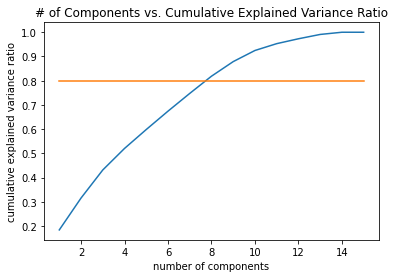

In [ ]:
#find optimal num components to use (n) by plotting explained variance ratio

# Plot
plt.plot(np.arange(1, 16), cum_evr)
plt.plot(np.arange(1, 16), [0.8]*15)


# Aesthetics
plt.title("# of Components vs. Cumulative Explained Variance Ratio")
plt.ylabel('cumulative explained variance ratio', size = 10)
plt.xlabel('number of components', size = 10)
plt.show()

From our plot, it is clear that 8 is the optimal number of components for this data. We fit a PCA with 8 components to our scaled training data and then used it to transform the testing set.

In [ ]:
# Get transformed set of principal components on x_test

# 1. Refit and transform on training with parameter n
pca = PCA(n_components=8)
pca_x_train = pca.fit_transform(scaled_x_train)

# 2. Transform on Testing Set and store it as `x_test_pca`
x_test_pca = pca.transform(scaled_x_test)

At this point, we are ready to use logistic regression on our features. We chose logistic regression because the question we are trying to answer is which nutrition grade a particular food is predicted to receive, i.e. a classification problem. In this case specifically, we are using multiclass classification.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize `log_reg_pca` model with multi_class parameter set to multinomial and solver set to 'lbfgs' and
# fit it on the PCA transformed training set
log_reg_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg_pca.fit(pca_x_train, y_train)

# Use the model to predict on the PCA transformed test set and save these predictions as `y_pred`
y_pred = log_reg_pca.predict(x_test_pca)

# Find the accuracy and store the value in `test_accuracy`
test_accuracy = log_reg_pca.score(x_test_pca, y_test)
test_accuracy

0.5903584672435105

The test accuracy of our logistic regression model came out to about 59.04%. This is not as high of a test accuracy as we would have hoped for, so we decided to try hyperparameter tuning using GridSearchCV in order to determine which parameters would result in the optimal model.
* Note 1: The below cell may take a few minutes to run.
* Note 2: 'lib-linear' is excluded as a solver because it does not perform multiclass regression

In [ ]:
# Import libraries
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = LogisticRegression(multi_class='multinomial')
solvers = ['newton-cg', 'lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(pca_x_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.608769 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.608728 (0.010397) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.608769 (0.010408) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.608583 (0.010411) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.608625 (0.010459) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.607388 (0.010189) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.607430 (0.010238) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.598013 (0.009551) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.598013 (0.009637) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.568035 (0.010561) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.568097 (0.010535) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


Clearly, all of the above models are performing around the same with test accuracies between 0.50 and 0.60. Our previous logistic regression model is comparable to the higher end of these models, so hyperparameter tuning did not benefit our model by much.

#Logistic Regression for Food Groups

Next, we wanted to create another logistic regression model to predict the food group that a food belonged to given its nutrition information. In order to do this, we constructed 'features_df' as shown below.

In [ ]:
features_df = df[['additives_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
                  'proteins_100g', 'sodium_100g', 'pnns_groups_1']]
features_df = features_df.rename(columns = {'fat_100g' : 'fat', 'carbohydrates_100g' : 'carbs', 'sugars_100g' : 'sugars',
                                                          'fiber_100g' : 'fiber', 'proteins_100g' : 'protein', 'sodium_100g' : 'sodium'
                                                          , 'additives_n' : 'additives', 'energy_100g' : 'energy',
                                            'pnns_groups_1' : 'category', 'saturated-fat_100g' : 'sat_fat'})

features_df = features_df.dropna()

# map food groups to numerical category

def fun(x):
  if x == 'fruits and vegetables':
    return 0
  elif x == 'composite foods':
    return 1
  elif x == 'fish meat eggs':
    return 2
  elif x == 'fat and sauces':
    return 3
  elif x == 'milk and dairy products':
    return 4
  elif x == 'beverages':
    return 5
  elif x == 'cereals and potatoes':
    return 6
  elif x == 'salty snacks':
    return 7
  else:
    return 8

features_df['num_category'] = features_df['category'].apply(lambda x : fun(x))
features_df = features_df.drop(columns = ['category'])


The new features are the nutrition facts and the label is the food category/group.

In [ ]:
features2 = features_df[['additives', 'energy', 'fat', 'sat_fat', 'carbs', 'sugars', 'fiber', 'protein', 'sodium']]

In [ ]:
labels2 = features_df['num_category']

We again split the data into training and testing sets with an 80-20 split and then scaled and performed PCA.

In [ ]:
# Assign appropriate value to seed and conduct 80/20 train-test split with random_state = seed
seed = 42
x_train2, x_test2, y_train2, y_test2 = train_test_split(features2, labels2, random_state = seed, test_size = 0.2)

In [ ]:
# Intermediate step to address scale-invariance
scaler2 = StandardScaler()
scaler2.fit(x_train2)
scaled_x_train2 = scaler2.transform(x_train2)
scaled_x_test2 = scaler2.transform(x_test2)

# Instantiate and Fit PCA
pca2 = PCA(n_components = scaled_x_train2.shape[1])
pca_x_train2 = pca2.fit_transform(scaled_x_train2)
print(pca_x_train2.shape)
print(pca2.components_)

(21146, 9)
[[ 3.80851374e-02  5.67609436e-01  4.52218086e-01  4.25257523e-01
   3.38354860e-01  3.30890793e-01  2.27671928e-01  1.19245918e-01
  -3.15763897e-02]
 [-2.55032194e-01  1.60280550e-02  3.97988740e-01  3.23721593e-01
  -5.32443649e-01 -4.73372153e-01 -8.90365181e-02  3.71349127e-01
   1.34558033e-01]
 [-3.14195896e-01  6.51848681e-02 -2.20801334e-01 -3.31971201e-01
   2.15489083e-01 -1.75790304e-01  6.24364462e-01  5.15189177e-01
   7.40615844e-02]
 [ 4.66702061e-01  3.87904110e-02 -3.15984761e-02 -4.50298374e-02
   7.25534981e-02 -2.40715043e-02 -5.33434222e-02  1.38773441e-01
   8.65858709e-01]
 [-7.55723851e-01 -1.75837581e-02 -2.03663375e-03  5.38990410e-02
   6.25079636e-02  2.04878132e-01 -4.52406154e-02 -3.94023479e-01
   4.71677336e-01]
 [ 2.11665656e-01 -1.12572394e-01  1.48612083e-01  1.09157434e-01
  -2.29449467e-01 -2.17317183e-01  7.02580614e-01 -5.59207041e-01
   4.81493544e-02]
 [ 2.98454077e-02 -3.56430374e-01 -1.96371892e-01  2.93747956e-01
  -4.13334446e-01

In [ ]:
# Save the explained variance ratios
explained_variance_ratios2 = pca2.explained_variance_ratio_
explained_variance_ratios2

array([0.31691086, 0.18294036, 0.14078751, 0.11238125, 0.10000907,
       0.07174329, 0.04660525, 0.02738812, 0.00123429])

In [ ]:
# Save the cumulative explained variance ratios
cum_evr2 = np.cumsum(explained_variance_ratios2)
cum_evr2

array([0.31691086, 0.49985123, 0.64063874, 0.75301999, 0.85302905,
       0.92477234, 0.97137759, 0.99876571, 1.        ])

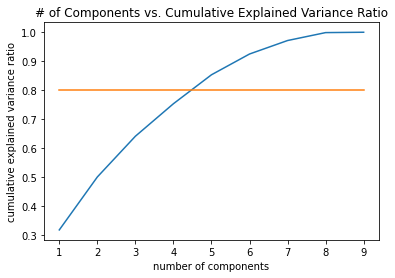

In [ ]:
# find optimal num components to use (n) by plotting explained variance ratio

# Plot
plt.plot(np.arange(1, 10), cum_evr2)
plt.plot(np.arange(1, 10), [0.8]*9)


# Aesthetics
plt.title("# of Components vs. Cumulative Explained Variance Ratio")
plt.ylabel('cumulative explained variance ratio', size = 10)
plt.xlabel('number of components', size = 10)
plt.show()

From the plot of cumulative explained variance ratio, we can see that the number of optimal components is closer to 5 now. We initialized a new PCA below with 5 components and transformed our test data with it.

In [ ]:
# Get transformed set of principal components on x_test

# 1. Refit and transform on training with parameter n
pca2 = PCA(n_components=5)
pca_x_train2 = pca2.fit_transform(scaled_x_train2)

# 2. Transform on Testing Set and store it as `x_test_pca2`
x_test_pca2 = pca2.transform(scaled_x_test2)

Finally, we peformed logistic regression and found that the accuracy was around 60.07%. Once again, this was not as high as we had hoped, but still fairly accurate.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize `log_reg_pca2` model with default parameters and fit it on the PCA transformed training set
log_reg_pca2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg_pca2.fit(pca_x_train2, y_train2)

# Use the model to predict on the PCA transformed test set and save these predictions as `y_pred2`
y_pred2 = log_reg_pca2.predict(x_test_pca2)

# Find the accuracy and store the value in `test_accuracy2`
test_accuracy2 = log_reg_pca2.score(x_test_pca2, y_test2)
test_accuracy2

0.6007187440892756

# Regularized vs Unregularized Regression

We were curious to see if the test accuracy was greatly affected by regularization, so we performed side-by-side logistic regressions of the two models from above (for nutrition grade and for food category). Our results concluded that there was no distinguishable difference in the test accuracies for either model if regularization was used. Note that a default L2 regularization was applied to the models above.

In [ ]:
# unregularized for nutrition score data
# Initialize `log_reg_pca` model with multiclass parameters and NO penalty and fit it on the PCA transformed training set
log_reg_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty = 'none')
log_reg_pca.fit(pca_x_train, y_train)

# Use the model to predict on the PCA transformed test set and save these predictions as `y_pred`
y_pred = log_reg_pca.predict(x_test_pca)

# Find the accuracy and store the value in `test_accuracy`
test_accuracy = log_reg_pca.score(x_test_pca, y_test)
test_accuracy

0.5915945611866502

In [ ]:
# regularized for nutrition score data
# Initialize `log_reg_pca` model with multiclass parameters and L2 penalty and fit it on the PCA transformed training set
log_reg_pca = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty = 'l2')
log_reg_pca.fit(pca_x_train, y_train)

# Use the model to predict on the PCA transformed test set and save these predictions as `y_pred`
y_pred = log_reg_pca.predict(x_test_pca)

# Find the accuracy and store the value in `test_accuracy`
test_accuracy = log_reg_pca.score(x_test_pca, y_test)
test_accuracy

0.5903584672435105

In [ ]:
# unregularized for food group data
# Initialize `log_reg_pca` model with multiclass parameters and NO penatly and fit it on the PCA transformed training set
log_reg_pca2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty = 'none', max_iter = 1000)
log_reg_pca2.fit(pca_x_train2, y_train2)

# Use the model to predict on the PCA transformed test set and save these predictions as `y_pred2`
y_pred2 = log_reg_pca2.predict(x_test_pca2)

# Find the accuracy and store the value in `test_accuracy`
test_accuracy2 = log_reg_pca2.score(x_test_pca2, y_test2)
test_accuracy2

0.6012861736334405

In [ ]:
# regularized for food group data
# Initialize `log_reg_pca` model with multiclass parameters and L2 penalty and fit it on the PCA transformed training set
log_reg_pca2 = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty = 'l2', max_iter = 1000)
log_reg_pca2.fit(pca_x_train2, y_train2)

# Use the model to predict on the PCA transformed test set and save these predictions as `y_pred2`
y_pred2 = log_reg_pca2.predict(x_test_pca2)

# Find the accuracy and store the value in `test_accuracy2`
test_accuracy2 = log_reg_pca2.score(x_test_pca2, y_test2)
test_accuracy2

0.6007187440892756

#K-Means Clustering

We also wanted to incorporate some unsupervised learning models, so we decided to try k-means clustering on our set of features. Our goal was to see if there was any natural clustering among the foods just based on nutrition facts.

In [ ]:
seed = 42
# select features to cluster on
k_features = features[['fat', 'carbs', 'sugars', 'fiber', 'protein', 'sodium']]

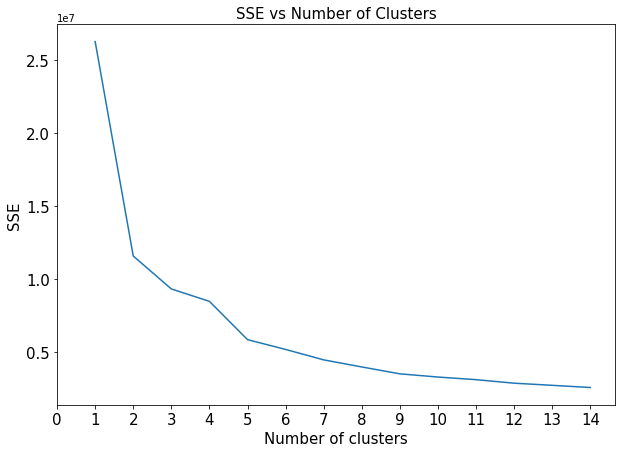

In [ ]:
from sklearn.cluster import KMeans

# perform clustering with incremental values of k
sse = {}
for k in range(1, 15):
    km = KMeans(n_clusters=k, init='random', n_init=1, max_iter=300, random_state=seed).fit(k_features)
    sse[k] = km.inertia_

# plot SSE vs number of clusters to determine optimal # of clusters
fig, ax = plt.subplots(figsize=(10,7))
ax.tick_params(axis='both', which='major', labelsize=15)
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters", size = 15)
plt.ylabel("SSE", size = 15)
plt.xticks(np.arange(0, 15, step=1))
plt.title('SSE vs Number of Clusters', size = 15)
plt.show()

From the plot above, we can see that the optimal number of clusters is 5, meaning that the k-means clustering algorithm grouped the feature data into 5 separate clusters. Our original dataset used 'pnns_groups_1' (which we called food category) as an indicator of foods that belonged to the same food group, and there were 9 different groups. However, the 5 clusters generated here logically makes sense because there are 5 main food groups that all foods tend to fall into.

#Decision Trees & Random Forest

For our last ML model, we decided to use tree-based models. First, we used single decision trees to fit the nutrition score and food group data. The accuracy for the decision trees was much higher than our logistic regression model accuracy, by about 20%. This could be explained by the fact that logistic regression tends to be more suitable for binary classification problems and since we were focused on multiclass classification, the logistic regression models did not perform as well.

In [ ]:
# train-test split
seed = 42
x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state = seed, test_size = 0.2)

In [ ]:
# decision tree for nutrition score data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize DecisionTreeClassifier with default parameters
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

# make prediction on test set
prediction = clf.predict(x_test)

# find accuracy of prediction
accuracy = accuracy_score(prediction, y_test)
print("Accuracy: %.1f%%"% (accuracy * 100))

Accuracy: 77.9%


In [ ]:
seed = 42
x_train2, x_test2, y_train2, y_test2 = train_test_split(features2, labels2, random_state = seed, test_size = 0.2)

In [ ]:
# Decision Tree for food group data
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize DecisionTreeClassifier with default parameters
clf = DecisionTreeClassifier()
clf = clf.fit(x_train2, y_train2)

# make prediction on test set
prediction2 = clf.predict(x_test2)

# find accuracy of prediction
accuracy = accuracy_score(prediction2, y_test2)
print("Accuracy: %.1f%%"% (accuracy * 100))

Accuracy: 80.4%


Next, we used Random Forests to fit our data. We expected the accuracy for the random forest models to be higher than the decision tree models. While this was true for the food category model, the accuracy stayed the same for the nutrition score model. We then performed some hyperparameter tuning with the max_depth to see increasing the max depth would improve our test accuracy.

In [ ]:
# random forest for nutrition score data
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with n_estimators = 100 and max_depth = 10 and predict on test set
clf = RandomForestClassifier(n_estimators = 100, max_depth = 10)
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)

# Find accuracy of prediction
accuracy = accuracy_score(prediction, y_test)
print("Accuracy: %.1f%%"% (accuracy * 100))

Accuracy: 78.3%


In [ ]:
# random forest for nutrition score data
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with n_estimators = 100 and max_depth = 15 and predict on test set
clf = RandomForestClassifier(n_estimators = 100, max_depth = 15)
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)

# Find accuracy of prediction
accuracy = accuracy_score(prediction, y_test)
print("Accuracy: %.1f%%"% (accuracy * 100))

Accuracy: 82.7%


In [ ]:
# random forest for nutrition score data
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with n_estimators = 100 and max_depth = 10 and predict on test set
clf = RandomForestClassifier(n_estimators = 100, max_depth = 30)
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)

# Find accuracy of prediction
accuracy = accuracy_score(prediction, y_test)
print("Accuracy: %.1f%%"% (accuracy * 100))

Accuracy: 83.2%


In [ ]:
# random forest for nutrition score data
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with n_estimators = 100 and max_depth = 10 and predict on test set
clf = RandomForestClassifier(n_estimators = 100, max_depth = 40)
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)

# Find accuracy of prediction
accuracy = accuracy_score(prediction, y_test)
print("Accuracy: %.1f%%"% (accuracy * 100))

Accuracy: 83.4%


For the nutrition score model, we found that the accuracy leveled off around 83% between a max_depth of 30 and 40, so setting max_depth = 30 seemed ideal.

In [ ]:
# random forest for food gorup data
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with n_estimators = 100 and max_depth = 10 and predict on test set
clf = RandomForestClassifier(n_estimators = 100, max_depth = 10)
clf.fit(x_train2, y_train2)
prediction2 = clf.predict(x_test2)

# Find accuracy of prediction
accuracy = accuracy_score(prediction2, y_test2)
print("Accuracy: %.1f%%"% (accuracy * 100))

Accuracy: 83.9%


In [ ]:
# random forest for food gorup data
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with n_estimators = 100 and max_depth = 15 and predict on test set
clf = RandomForestClassifier(n_estimators = 100, max_depth = 15)
clf.fit(x_train2, y_train2)
prediction2 = clf.predict(x_test2)

# Find accuracy of prediction
accuracy = accuracy_score(prediction2, y_test2)
print("Accuracy: %.1f%%"% (accuracy * 100))

Accuracy: 86.4%


In [ ]:
# random forest for food gorup data
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with n_estimators = 100 and max_depth = 30 and predict on test set
clf = RandomForestClassifier(n_estimators = 100, max_depth = 30)
clf.fit(x_train2, y_train2)
prediction2 = clf.predict(x_test2)

# Find accuracy of prediction
accuracy = accuracy_score(prediction2, y_test2)
print("Accuracy: %.1f%%"% (accuracy * 100))

Accuracy: 87.0%


In [ ]:
# random forest for food gorup data
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest with n_estimators = 100 and max_depth = 40 and predict on test set
clf = RandomForestClassifier(n_estimators = 100, max_depth = 40)
clf.fit(x_train2, y_train2)
prediction2 = clf.predict(x_test2)

# Find accuracy of prediction
accuracy = accuracy_score(prediction2, y_test2)
print("Accuracy: %.1f%%"% (accuracy * 100))

Accuracy: 86.9%


We found that setting max_depth to a value between 30 and 40 for the food group model also resulted in higher accuracy before leveling off around 87%.

# Obstacles/Challenges Faced

One obstacle we faced was that we were unable to visualize some of the trends we had been hoping to due to poorly structured data for some of those features (ex. brand). Another big challenge was that our dataset primarily had instances from France, so we were not able to perform as in-depth of an analysis as we would have liked in relation to the country each was food was consumed in. We also had trouble with using variety in the way we visualized our data, since almost all of the trends involved categorical data, so that restricted the types of plots we could use.

# Future Steps

Some future steps we could take to perform further analysis is possibly combatting the class imbalance by using oversampling or undersampling of the instances in our original dataframe. We could also try using different ML models, with more hyperparameter tuning to ensure that they are as accurate as possible. For EDA, it may be interesting to visualize trends in the consumption of specific nutrients across various countries and how this may correlate with the nutrition score that a country receives. We could also consider using and joining with multiple datasets from different sources that may have more representative samples and possibly further features to predict.